SoftMax function and the cross entropy loss these are the one of the most common functions used in neural networks . We will learn the math behind these functions and how we can use them in numpy and pyTorch. 
At the end we will learn typical classification neural network with those function 

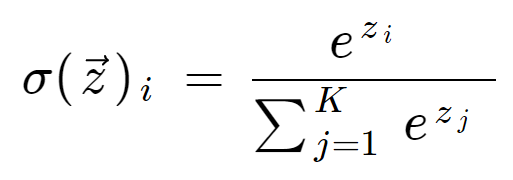


Basically it squashes the output to be between 0 and 1 . So we get probabilites.

In [3]:
import torch
import torch.nn as nn
import numpy as np


In [4]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x),axis=0)


x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('Softmax numpy:',outputs)

Softmax numpy: [0.65900114 0.24243297 0.09856589]


***Calculating it in pyTorch ***

In [5]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x,dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


*Softmax function is combined with the so celled cross entropy loss so this measures the performance of our classification model whose output is a porbability between 0 & 1 and it can be used in multi class problems and the loss increases as the predicted probability diverges from the actual label so the better our prediction the lower is our loss .*

In [6]:
def cross_entropy(actual,predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss



Y = np.array([1,0,0])

y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.6])


l1 = cross_entropy(Y,y_pred_good)
l2 = cross_entropy(Y,y_pred_bad)

print(f'Loss1 numpy:{l1:.4f}')
print(f'Loss2 numpy:{l2:.4f}')


Loss1 numpy:0.3567
Loss2 numpy:2.3026


Now let's see how we can do this on pyTorch

In [7]:
# Careful

# nn.CrossEntropyLoss applies
# nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)

# The cross-entropy loss alaready applies the lock softmax and then the negative log likelihood

# So we should not implement the softmax layer for ourselves 

# Our Y must not be one hot encoded so we should only put the correct class label

loss = nn.CrossEntropyLoss()

# Let's create our actual labels
Y = torch.tensor([0])

# nsamples x nclasses = 1x3

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # This are the row values so we didn't apply the softmax 
Y_pred_bad = torch.tensor([[0.5,2.0,0.3]])


l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)

print(l1.item())
print(l2.item())

0.4170299470424652
1.840616226196289


***Now to get actual predictions ***

In [8]:
_, prediction1 = torch.max(Y_pred_good,1)
_, prediction2 = torch.max(Y_pred_bad,1)

print(prediction1)
print(prediction2)

tensor([0])
tensor([1])


Loss in pyTorch allows for multiple samples 

How typical neural networks looks like 

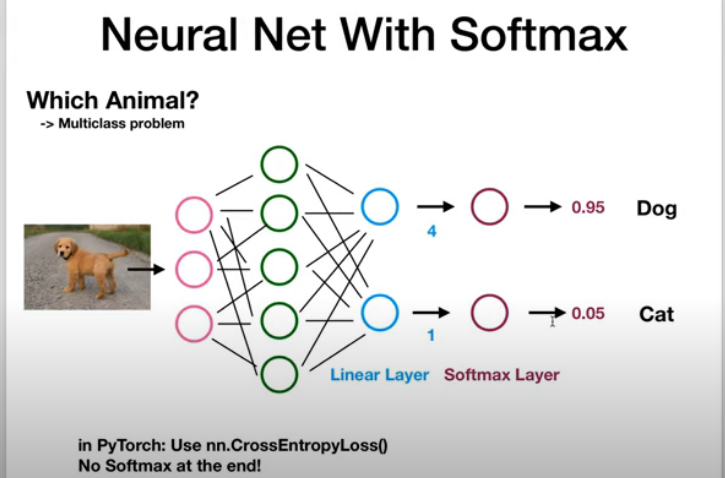

***Let's see how the code looks on multi_class***

In [12]:
# Multiclass Problem

class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
     out = self.linear1(x)   
     out = self.relu(out)
     out = self.linear2(out)

     return out

model = NeuralNet2(input_size=28*28,hidden_size=5,num_classes=3)
criterion = nn.CrossEntropyLoss() # (applies SoftMax) 


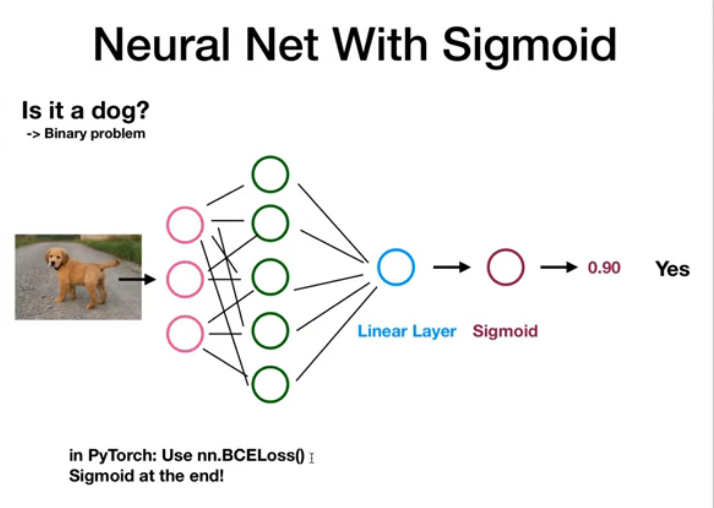

***Our Neural Net in binary classification case ***

In [13]:
# Multiclass Problem

class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1) # 1 in here is always fixed

  def forward(self,x):
     out = self.linear1(x)   
     out = self.relu(out)
     out = self.linear2(out)

     # We must implement the sigMoid function 

     y_pred = torch.sigmoid(out)

     return y_pred

model = NeuralNet2(input_size=28*28,hidden_size=5,num_classes=3)
criterion = nn.BCELoss() # (We use binary cross entropyLoss) 
